In [2]:
from helpers import *

In [3]:
df = pd.read_csv("full_data.csv").drop(columns=["customer_unique_id", "last_order_date"], axis=1)

print(df.columns)
print(df.shape)
df.head()

Index(['avg_delivery_delay', 'items_nb', 'avg_satisfaction', 'cat_Auto',
       'cat_Books', 'cat_Electronics & Appliances', 'cat_Fashion',
       'cat_Food and Drinks', 'cat_Health and Beauty', 'cat_Home & Furniture',
       'cat_Miscellaneous', 'cat_Music', 'cat_Pets', 'cat_Sports', 'cat_Tools',
       'cat_Toys & Baby', 'recency_score', 'frequency_score', 'monetary_score',
       'rfm_score'],
      dtype='object')
(96096, 20)


,avg_delivery_delay,items_nb,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
0,6.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,4,414
1,3.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,411
2,25.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,112
3,20.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1,211
4,13.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,5,215


In [4]:
# Check if the CSV files already exist  
if not os.path.isfile('df_pca.csv'):  
    # Perform PCA  
    pca = PCA(n_components=2)  
    df_pca = pca.fit_transform(df)  
    # Convert ndarray to DataFrame  
    df_pca = pd.DataFrame(df_pca, columns=['PCA_1', 'PCA_2'])  
    # Save the PCA results to a CSV file  
    df_pca.to_csv('df_pca.csv', index=False)  
else:  
    # Load the PCA results from the existing CSV file  
    df_pca = pd.read_csv('df_pca.csv')  
  
if not os.path.isfile('df_tsne.csv'):  
    # Perform t-SNE  
    tsne = TSNE(random_state=42)  
    df_tsne = tsne.fit_transform(df)  
    # Convert ndarray to DataFrame  
    df_tsne = pd.DataFrame(df_tsne, columns=['TSNE_1', 'TSNE_2'])  
    # Save the t-SNE results to a CSV file  
    df_tsne.to_csv('df_tsne.csv', index=False)  
else:  
    # Load the t-SNE results from the existing CSV file  
    df_tsne = pd.read_csv('df_tsne.csv')  
  
if not os.path.isfile('df_tsne_pca.csv'):  
    # Perform t-SNE on PCA results  
    df_tsne_pca = tsne.fit_transform(df_pca)  
    # Convert ndarray to DataFrame  
    df_tsne_pca = pd.DataFrame(df_tsne_pca, columns=['TSNE_PCA_1', 'TSNE_PCA_2'])  
    # Save the t-SNE on PCA results to a CSV file  
    df_tsne_pca.to_csv('df_tsne_pca.csv', index=False)  
else:  
    # Load the t-SNE on PCA results from the existing CSV file  
    df_tsne_pca = pd.read_csv('df_tsne_pca.csv')  

In [5]:
# KMEANS

csv_file_score_kmeans = 'scores/scores_kmeans.csv'

if os.path.exists(csv_file_score_kmeans):  
    scores_df_kmeans = pd.read_csv(csv_file_score_kmeans)  
else:  
    scores_df_kmeans = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type', 'model_path'])  

n_clusters = np.arange(3, 16, 1) 
algorithms = ["lloyd", "elkan"]
# scores_df_kmeans = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])

for n_cluster in n_clusters: 
    for algo in algorithms: 
        print("Doing one...")
        if scores_df_kmeans[(scores_df_kmeans['n_cluster'] == n_cluster) & (scores_df_kmeans['type'] == f"kmeans-pca-{algo}")].empty:  
            (n1, silhouette1, calinski_harabasz1, davies_bouldin1, kmeans_pca) = calculate_score_kmeans(df_pca, n_cluster, algo)
            model_path = f'./models/kmeans_pca_model_{n_cluster}_{algo}.pkl'
            scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"kmeans-pca-{algo}", "model_path": model_path}])])
            scores_df_kmeans.to_csv(csv_file_score_kmeans, index=False)  
            save_model(model_path, kmeans_pca)
        
        if scores_df_kmeans[(scores_df_kmeans['n_cluster'] == n_cluster) & (scores_df_kmeans['type'] == f"kmeans-tsne-pca-{algo}")].empty:  
            (n2, silhouette2, calinski_harabasz2, davies_bouldin2, kmeans_tsne_pca) = calculate_score_kmeans(df_tsne_pca, n_cluster, algo)
            model_path = f'./models/kmeans_tsne_pca_model_{n_cluster}_{algo}.pkl'
            scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"kmeans-tsne-pca-{algo}", "model_path": model_path}])])
            scores_df_kmeans.to_csv(csv_file_score_kmeans, index=False)  
            save_model(model_path, kmeans_tsne_pca)
            
        if scores_df_kmeans[(scores_df_kmeans['n_cluster'] == n_cluster) & (scores_df_kmeans['type'] == f"kmeans-tsne-{algo}")].empty:  
            (n3, silhouette3, calinski_harabasz3, davies_bouldin3, kmeans_tsne) = calculate_score_kmeans(df_tsne, n_cluster, algo)
            model_path = f'./models/kmeans_tsne_model_{n_cluster}_{algo}.pkl'
            scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"kmeans-tsne-{algo}", "model_path": model_path}])])
            scores_df_kmeans.to_csv(csv_file_score_kmeans, index=False)
            save_model(model_path, kmeans_tsne)


Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...


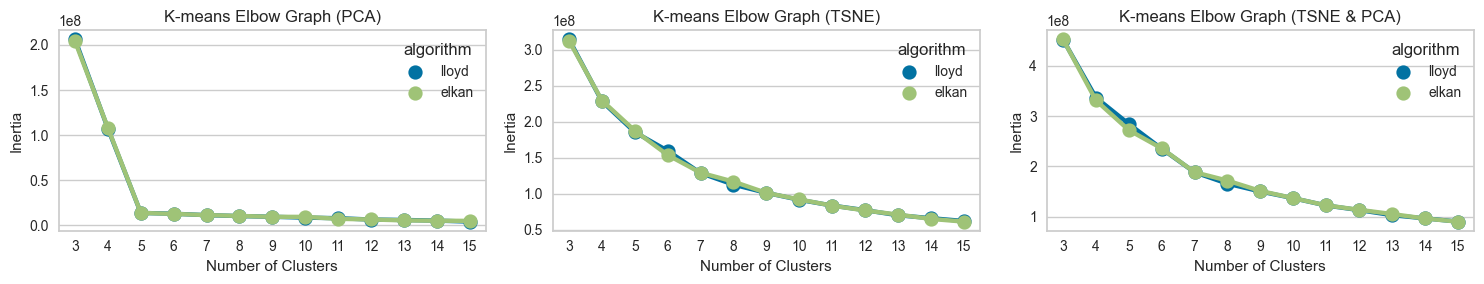

In [6]:
inertias_pca = []
inertias_tsne = []
inertias_tsne_pca = []

# inertias_pca.append((n_cluster, algo, kmeans_pca.inertia_))
scores_df_kmeans = pd.read_csv(csv_file_score_kmeans)  

for _, row in scores_df_kmeans.iterrows():
   # Load the model  
    with open(row["model_path"], 'rb') as f:  
        model = pickle.load(f)
        
    inertia = model.inertia_  
    if "kmeans_pca_model" in row["model_path"]:  
        inertias_pca.append((row["n_cluster"], row["type"].replace("kmeans-pca-", ""), model.inertia_))  
    if "kmeans_tsne_pca_model" in row["model_path"]:  
        inertias_tsne_pca.append((row["n_cluster"], row["type"].replace("kmeans-tsne-pca-", ""), model.inertia_))  
    if "kmeans_tsne_model" in row["model_path"]:  
        inertias_tsne.append((row["n_cluster"], row["type"].replace("kmeans-tsne-", ""), model.inertia_))
        
        
# Create the figure and axis objects  
fig, axs = plt.subplots(1, 3, figsize=(15, 3))  
  
# Plotting the elbow graph (PCA)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_pca, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[0])  
axs[0].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (PCA)')  
  
# Plotting the elbow graph (TSNE)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_tsne, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[1])  
axs[1].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (TSNE)')  
  
# Plotting the elbow graph (TSNE & PCA)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_tsne_pca, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[2])  
axs[2].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (TSNE & PCA)')  
  
# Adjust the spacing between plots  
plt.tight_layout()  
  
# Show the plots  
plt.show()  

In [6]:
# Kernel died with too much data
# csv_file_score_agglo = 'scores/scores_agglo.csv'

# if os.path.exists(csv_file_score_agglo):  
#     scores_df_agglomerative = pd.read_csv(csv_file_score_agglo)  
# else:  
#     scores_df_agglomerative = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  


# # AGGLOMERATIVE  
# n_clusters = np.arange(3, 16, 1)  
# linkages = ["ward", "complete", "average", "single"]  
# # scores_df_agglomerative = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  

# for n_cluster in n_clusters:  
#     for linkage in linkages:  
#         print("Doing one...")
        
#         if scores_df_agglomerative[(scores_df_agglomerative['n_cluster'] == n_cluster) & (scores_df_agglomerative['type'] == f"agglo-pca-{linkage}")].empty:  
#             print(f"n_cluster={n_cluster}", f"agglo-pca-{linkage}")
#             (n1, silhouette1, calinski_harabasz1, davies_bouldin1, _) = calculate_score_agglomerative(df_pca, n_cluster, linkage)
#             scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"agglo-pca-{linkage}"}])])
#             scores_df_agglomerative.to_csv(csv_file_score_agglo, index=False)
            
#         if scores_df_agglomerative[(scores_df_agglomerative['n_cluster'] == n_cluster) & (scores_df_agglomerative['type'] == f"agglo-tsne-pca-{linkage}")].empty:  
#             print(f"n_cluster={n_cluster}", f"agglo-tsne-pca-{linkage}")
#             (n2, silhouette2, calinski_harabasz2, davies_bouldin2, _) = calculate_score_agglomerative(df_tsne_pca, n_cluster, linkage)
#             scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"agglo-tsne-pca-{linkage}"}])])
#             scores_df_agglomerative.to_csv(csv_file_score_agglo, index=False)
           
#         if scores_df_agglomerative[(scores_df_agglomerative['n_cluster'] == n_cluster) & (scores_df_agglomerative['type'] == f"agglo-tsne-{linkage}")].empty:  
#             print(f"n_cluster={n_cluster}", f"agglo-tsne-{linkage}")
#             (n3, silhouette3, calinski_harabasz3, davies_bouldin3, _) = calculate_score_agglomerative(df_tsne, n_cluster, linkage)
#             scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"agglo-tsne-{linkage}"}])])
#             scores_df_agglomerative.to_csv(csv_file_score_agglo, index=False)

In [7]:
csv_file_score_gaussian = 'scores/scores_gaussian.csv'

if os.path.exists(csv_file_score_gaussian):  
    scores_df_gaussian = pd.read_csv(csv_file_score_gaussian)  
else:  
    scores_df_gaussian = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  

# "gaussian_mixture": {
#     "n_components": n_clusters,  
#     "covariance_type": ["full", "tied", "diag", "spherical"]  
# },
# GAUSSIAN MIXTURE

n_components = np.arange(3, 16, 1)  
covariance_type = ["full", "tied", "diag", "spherical"]
for n_cluster in n_components: 
    for covariance in covariance_type:
        print("Doing one...")
        if scores_df_gaussian[(scores_df_gaussian['n_cluster'] == n_cluster) & (scores_df_gaussian['type'] == f"gaussian-pca-{covariance}")].empty:  
            print(f"n_cluster={n_cluster}", f"gaussian-pca-{covariance}")
            (n1, silhouette1, calinski_harabasz1, davies_bouldin1, _) = calculate_score_gaussian_mixture(df_pca, n_cluster, covariance)
            scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"gaussian-pca-{covariance}"}])])
            scores_df_gaussian.to_csv(csv_file_score_gaussian, index=False)
            
        if scores_df_gaussian[(scores_df_gaussian['n_cluster'] == n_cluster) & (scores_df_gaussian['type'] == f"gaussian-tsne-pca-{covariance}")].empty:  
            print(f"n_cluster={n_cluster}", f"gaussian-tsne-pca-{covariance}")
            (n2, silhouette2, calinski_harabasz2, davies_bouldin2, _) = calculate_score_gaussian_mixture(df_tsne_pca, n_cluster, covariance)
            scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"gaussian-tsne-pca-{covariance}"}])])
            scores_df_gaussian.to_csv(csv_file_score_gaussian, index=False)
            
        if scores_df_gaussian[(scores_df_gaussian['n_cluster'] == n_cluster) & (scores_df_gaussian['type'] == f"gaussian-tsne-{covariance}")].empty:  
            print(f"n_cluster={n_cluster}", f"gaussian-tsne-{covariance}")
            (n3, silhouette3, calinski_harabasz3, davies_bouldin3, _) = calculate_score_gaussian_mixture(df_tsne, n_cluster, covariance)
            scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"gaussian-tsne-{covariance}"}])])
            scores_df_gaussian.to_csv(csv_file_score_gaussian, index=False)

Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...


In [8]:
csv_file_score_dbscan = 'scores/scores_dbscan.csv'

if os.path.exists(csv_file_score_dbscan):  
    scores_df_dbscan = pd.read_csv(csv_file_score_dbscan)  
else:  
    scores_df_dbscan = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  

# eps = np.arange(0.5, 10, 0.5)  
# min_samples = np.arange(5, 20, 5)
eps = np.arange(0.5, 5.5, 1)
min_samples = np.arange(10, 150, 30)

for eps_param in eps: 
    for min_samples_param in min_samples: 
        print("Doing one...")
        
        if scores_df_dbscan[(scores_df_dbscan['type'] == f"dbscan-pca-{eps_param}-{min_samples_param}")].empty:  
            print(f"dbscan-pca-{eps_param}-{min_samples_param}")
            (n1, silhouette1, calinski_harabasz1, davies_bouldin1, dbscan1) = calculate_score_dbscan(df_pca, eps=eps_param, min_samples=min_samples_param)
            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n1,'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1,  'type': f"dbscan-pca-{eps_param}-{min_samples_param}"}])])
            scores_df_dbscan.to_csv(csv_file_score_dbscan, index=False)
        
        if scores_df_dbscan[(scores_df_dbscan['type'] == f"dbscan-tsne-pca-{eps_param}-{min_samples_param}")].empty:  
            print(f"dbscan-tsne-pca-{eps_param}-{min_samples_param}")
            (n2, silhouette2, calinski_harabasz2, davies_bouldin2, dbscan2) = calculate_score_dbscan(df_tsne_pca, eps=eps_param, min_samples=min_samples_param)
            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n2,'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2,  'type': f"dbscan-tsne-pca-{eps_param}-{min_samples_param}"}])])
            scores_df_dbscan.to_csv(csv_file_score_dbscan, index=False)

        if scores_df_dbscan[(scores_df_dbscan['type'] == f"dbscan-tsne-{eps_param}-{min_samples_param}")].empty:  
            print(f"dbscan-tsne-{eps_param}-{min_samples_param}")
            (n3, silhouette3, calinski_harabasz3, davies_bouldin3, dbscan3) = calculate_score_dbscan(df_tsne, eps=eps_param, min_samples=min_samples_param)
            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n3,'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3,  'type': f"dbscan-tsne-{eps_param}-{min_samples_param}"}])])
            scores_df_dbscan.to_csv(csv_file_score_dbscan, index=False)



Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...
Doing one...


kmeans
Best silhouette = kmeans-pca-lloyd (0.8815432991376841)
Best calinski_harabasz = kmeans-pca-lloyd (3391193.375565637)
Best min_davies_bouldin = kmeans-pca-lloyd (0.1654163091461663)


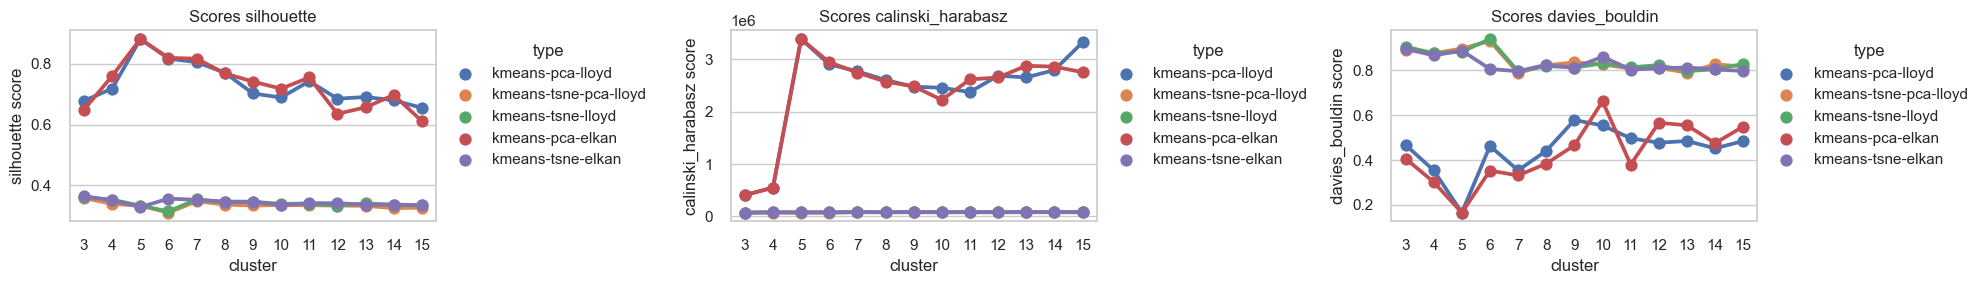

GaussianMixture
Best silhouette = gaussian-pca-tied (0.8815432991376841)
Best calinski_harabasz = gaussian-pca-tied (3391193.375565637)
Best min_davies_bouldin = gaussian-pca-tied (0.1654163091461663)


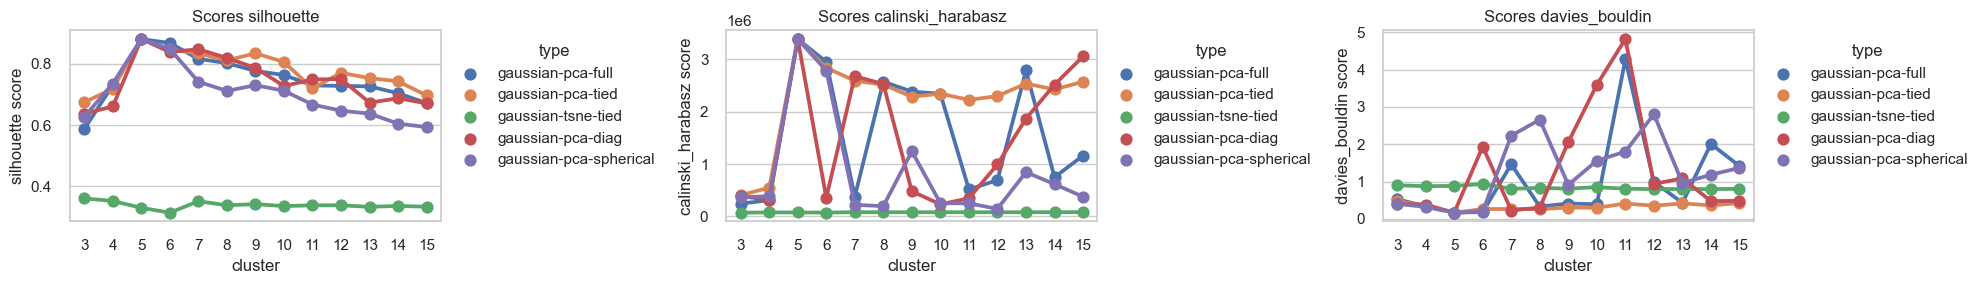

DBSCAN
Best silhouette = dbscan-pca-1.5-130 (0.8107766835826692)
Best calinski_harabasz = dbscan-pca-4.5-10 (1779472.5221103798)
Best min_davies_bouldin = dbscan-tsne-1.5-100 (0.6390183271527659)


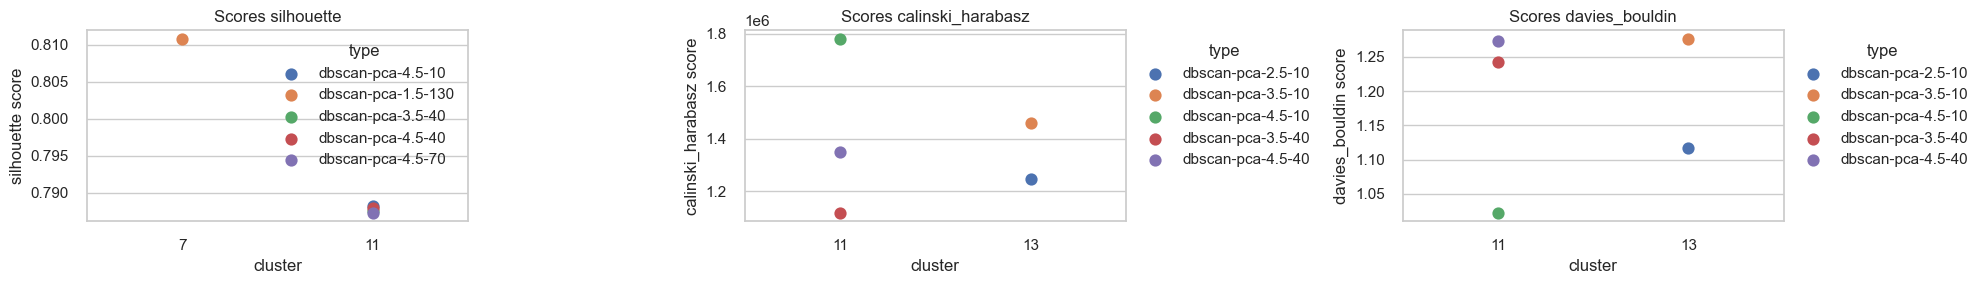

In [24]:
sns.set(style="whitegrid")    
# for title, df_score in [["kmeans", scores_df_kmeans], ["AgglomerativeClustering",scores_df_agglomerative], ["GaussianMixture",scores_df_gaussian]]:
for title, df_score in [["kmeans", scores_df_kmeans], ["GaussianMixture",scores_df_gaussian], ["DBSCAN", scores_df_dbscan]]:
    
    print(title)
    
    df_score = df_score[(df_score["n_cluster"] < 20) & (df_score["n_cluster"] > 1)]

    top_5_types = df_score.groupby('type')['silhouette'].mean().nlargest(5).index  
    df_top_5 = df_score[df_score['type'].isin(top_5_types)]  
    
    plt.figure(figsize=(20, 3))  
    ax1 = plt.subplot(1, 3, 1)  
    sns.pointplot(data=df_top_5, x='n_cluster', y='silhouette', hue="type")    
    plt.title('Scores silhouette')  
    plt.xlabel('cluster')    
    plt.ylabel('silhouette score')    
    plt.legend(title='type', bbox_to_anchor=(1, 1))    
    
    
    top_5_types = df_score.groupby('type')['calinski_harabasz'].mean().nlargest(5).index  
    df_top_5 = df_score[df_score['type'].isin(top_5_types)]  
    
    ax2 = plt.subplot(1, 3, 2)  
    sns.pointplot(data=df_top_5, x='n_cluster', y='calinski_harabasz', hue="type")    
    plt.title('Scores calinski_harabasz')  
    plt.xlabel('cluster')    
    plt.ylabel('calinski_harabasz score')    
    plt.legend(title='type', bbox_to_anchor=(1, 1))    
    
    
    top_5_types = df_score.groupby('type')['calinski_harabasz'].mean().nlargest(5).index  
    df_top_5 = df_score[df_score['type'].isin(top_5_types)]  
    
    ax3 = plt.subplot(1, 3, 3)  
    sns.pointplot(data=df_top_5, x='n_cluster', y='davies_bouldin', hue="type")    
    plt.title('Scores davies_bouldin')  
    plt.xlabel('cluster')    
    plt.ylabel('davies_bouldin score')    
    plt.legend(title='type', bbox_to_anchor=(1, 1))    
    
    min_silhouette = df_score[df_score['silhouette'] == df_score['silhouette'].max()]
    min_calinski_harabasz = df_score[df_score['calinski_harabasz'] == df_score['calinski_harabasz'].max()]
    min_davies_bouldin = df_score[df_score['davies_bouldin'] == df_score['davies_bouldin'].min()]
    
    print(f"Best silhouette = {min_silhouette['type'].values[0]} ({min_silhouette['silhouette'].values[0]})")  
    print(f"Best calinski_harabasz = {min_calinski_harabasz['type'].values[0]} ({min_calinski_harabasz['calinski_harabasz'].values[0]})")  
    print(f"Best min_davies_bouldin = {min_davies_bouldin['type'].values[0]} ({min_davies_bouldin['davies_bouldin'].values[0]})")  
    
    plt.tight_layout()  
    plt.show()

In [42]:
df_pca

,PCA_1,PCA_2
0,100.271007,-5.068343
1,97.289677,-8.095313
2,-201.864152,11.963645
3,-102.828274,7.571981
4,-98.780532,0.624723
...,...,...
96091,-198.875584,13.953010
96092,-1.891321,18.245072
96093,-200.790488,0.921293
96094,100.237994,-0.073625


In [13]:
with open("models/kmeans_pca_model_5_lloyd.pkl", 'rb') as f:  
    kmeans = pickle.load(f)

kmeans.fit(df_pca)

KMeans(n_clusters=5, n_init='auto')

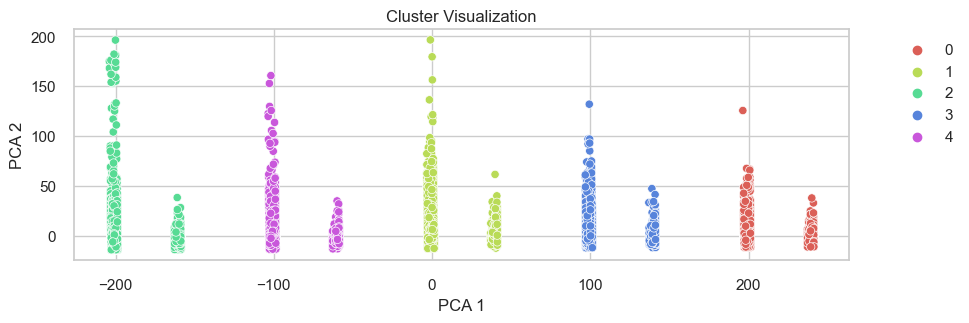

In [60]:
# print(silhouette_score(df_pca, labels))
df_clusters = pd.DataFrame(df_pca, columns=['PCA_1', 'PCA_2'])  
df_clusters['Cluster'] = kmeans.labels_

# Define the colors for each cluster label  
colors = sns.color_palette('hls', len(df_clusters['Cluster'].unique()))  

# Create a scatter plot
plt.figure(figsize=(10, 3))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', palette=colors, data=df_clusters)  
plt.title('Cluster Visualization')  
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))  

plt.show()

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



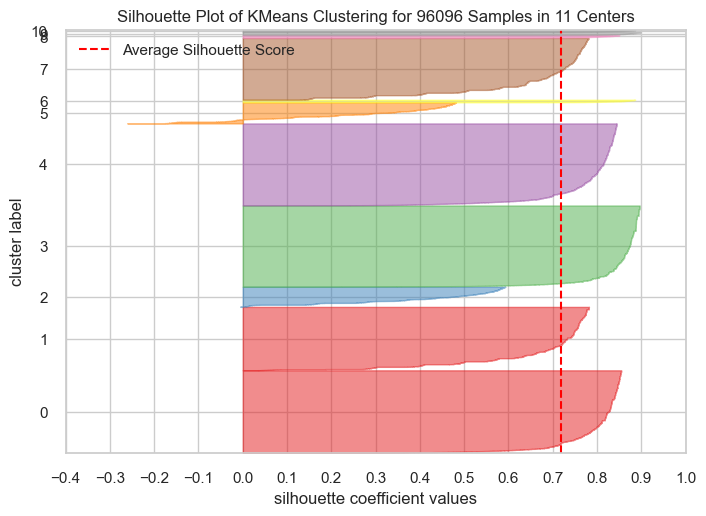

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 96096 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(df_pca)    # Fit the data to the visualizer
visualizer.poof()

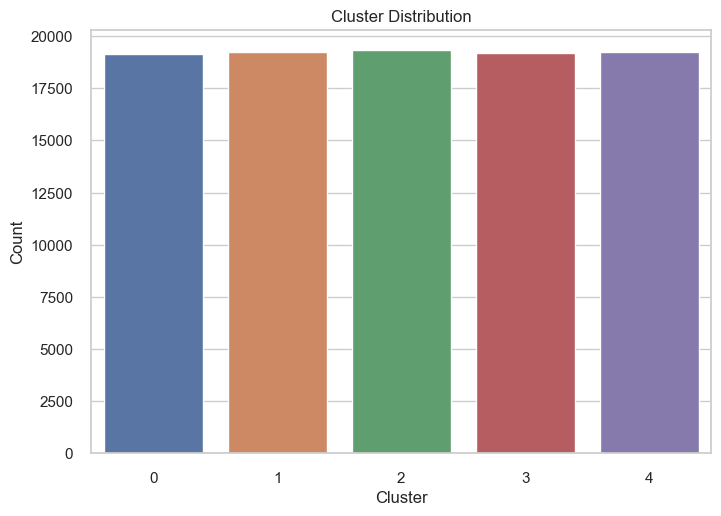

In [77]:
# Plot value counts of "Cluster" column  
sns.countplot(data=df_clusters, x="Cluster")  
  
# Customize the plot
plt.xlabel("Cluster")  
plt.ylabel("Count")  
plt.title("Cluster Distribution")  
  
# Show the plot  
plt.show()

In [78]:
X_test_clusters

,avg_delivery_delay,items_nb,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
cluster_labels,,,,,,,,,,,,,,,,,,,,
0,8.115361,1.177390,4.237145,0.051377,0.010349,0.156431,0.101030,0.016255,0.153609,0.294622,0.040140,0.007160,0.024669,0.068834,0.056029,0.061778,5.0,1.142790,3.003397,514.431297
1,14.719615,1.165982,3.898646,0.041496,0.008788,0.203838,0.085123,0.010972,0.119027,0.270501,0.077219,0.006968,0.012844,0.086215,0.047579,0.062399,3.0,1.132494,2.983464,314.308408
2,11.375093,1.146589,4.063924,0.032276,0.006000,0.162261,0.084260,0.004707,0.115192,0.298919,0.095484,0.006052,0.018052,0.079450,0.041587,0.072777,1.0,1.097243,2.937671,113.910102
3,12.095732,1.192187,4.013073,0.047617,0.011578,0.184990,0.100240,0.011735,0.120111,0.281162,0.055335,0.008970,0.019297,0.080891,0.055127,0.064462,4.0,1.128716,3.049598,414.336758
4,12.263247,1.178153,4.016979,0.030117,0.006242,0.149285,0.099818,0.007074,0.115891,0.274850,0.086086,0.006138,0.014148,0.087646,0.057841,0.091235,2.0,1.122757,2.986528,214.214096


In [27]:
X_test = pd.DataFrame(df, index=df.index, columns=df.columns)
X_test["cluster_labels"] = kmeans.labels_

X_test_clusters = X_test.groupby("cluster_labels").mean()
plot_radars(data=X_test_clusters, group="cluster_labels")

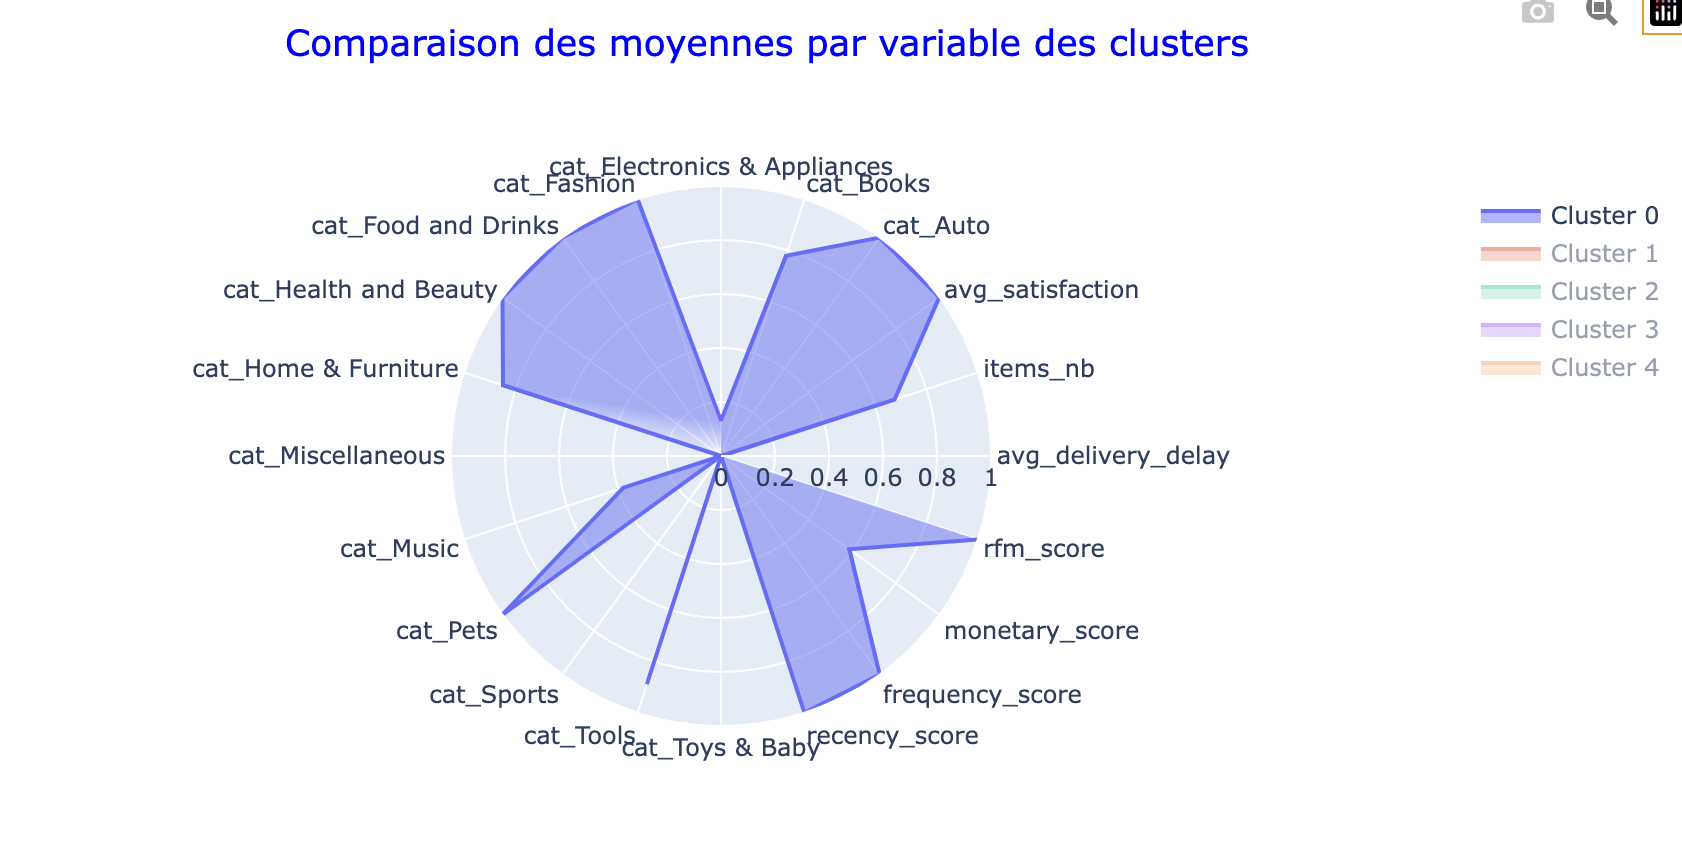

**Cluster clients loyaux**

**Définition:** 
- Meilleure fréquence d'achat. 
- Meilleure taux de satisfaction, 
- Délai de livraison le plus court,
- 1.18 article par commande en moyenne (2e le plus elevé)
- Catégories Alimentation & Boissons, Santé & Beauté, Animaux, Mode, Auto, Livres, Outils, et Maison & Mobilier

**Actions recommandées:**
- Pas forcément d'acion nécessaire, les clients sont déjà les plus satisfait.
- On peut leur proposer des promotions ou avantages pour les fidéliser.

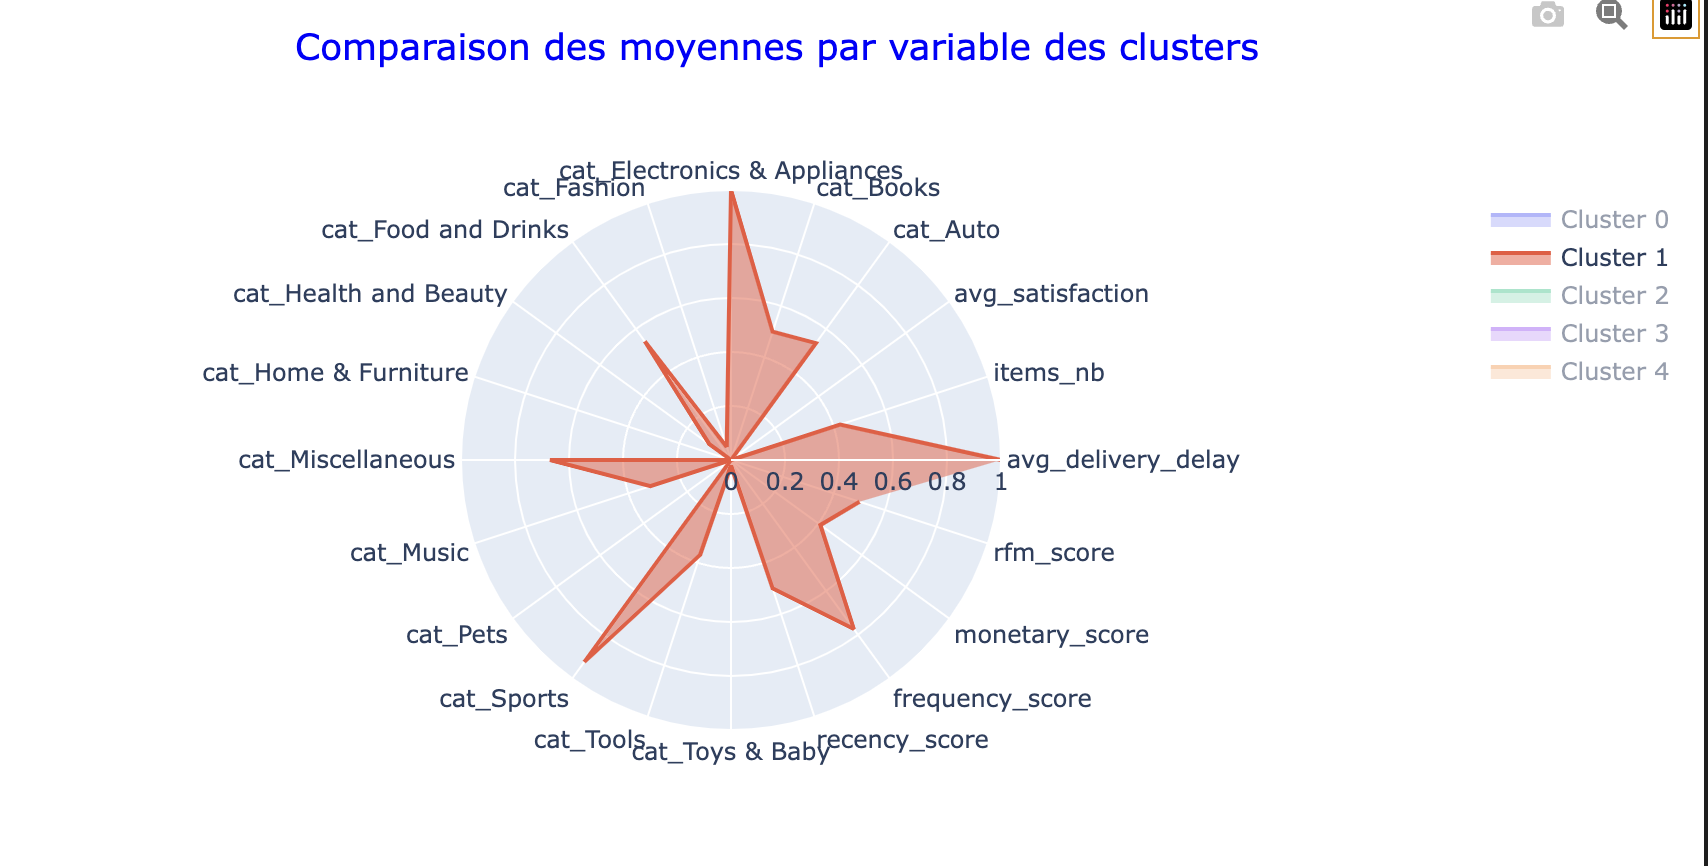

**Cluster client insatisfait**

**Définition:** 
- 2e meilleure fréquence d'achat,
- Pire taux de satisfaction,
- Délai de livraison le plus long,
- 1.17 article par commande en moyenne (dans la moyenne)
- Catégories: Électronique & Électroménager, Sports

**Actions recommandées:**

- Mettre en place des mesures pour réduire le délai de livraison,
- Restaurer leur confiance en mettant en informerant les clients des mesures prises pour résoudre les problèmes identifiés,
- Offrir des bons promo pour les inciter à revenir.

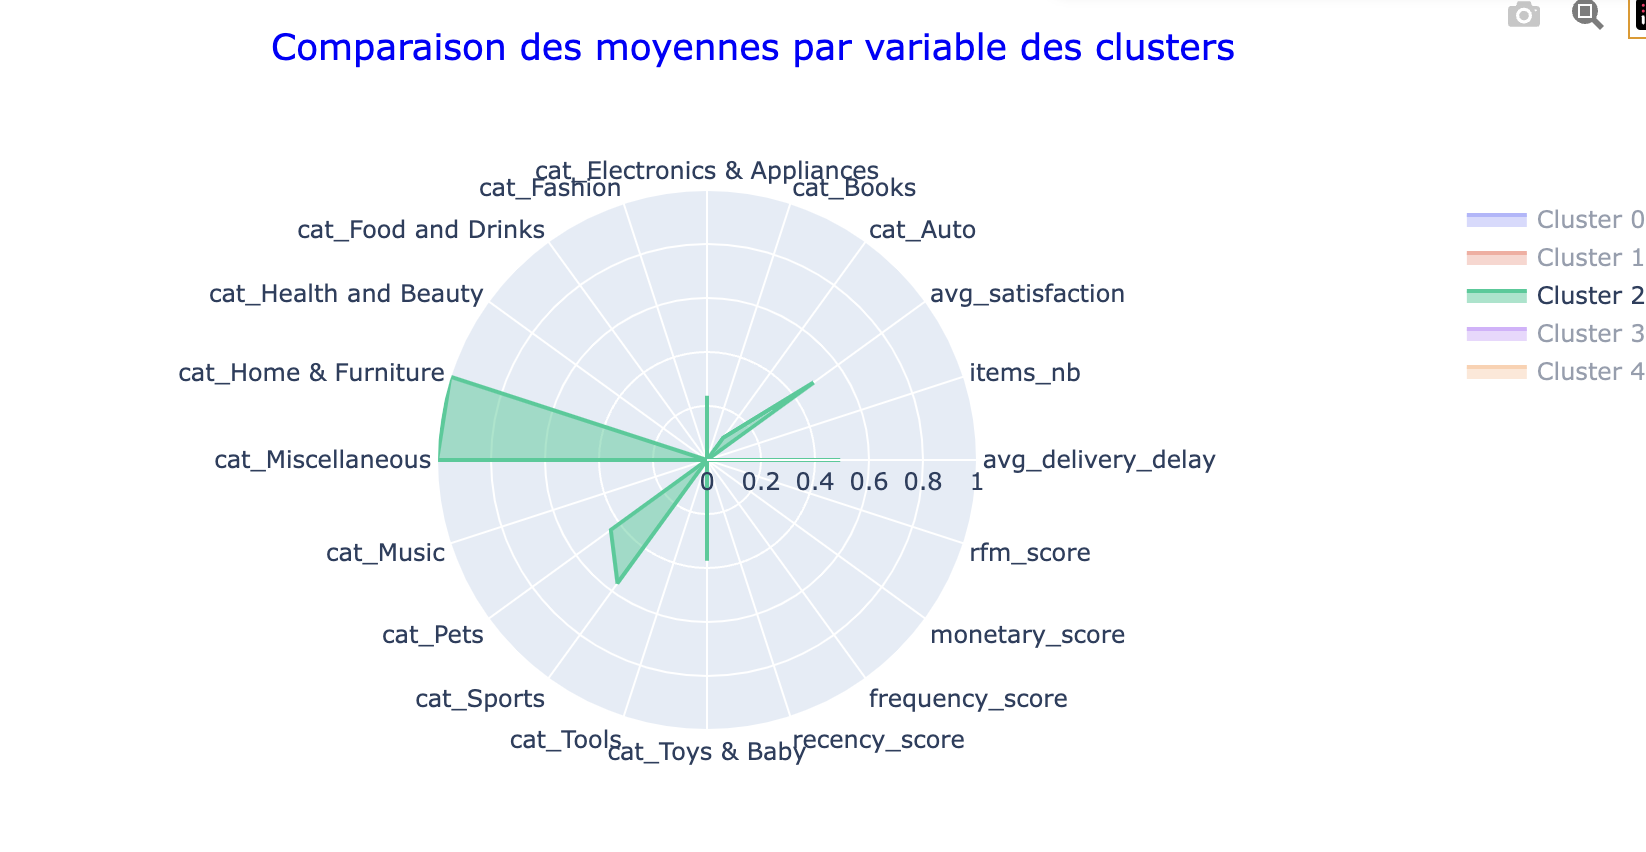

**Cluster à Faible Fréquence d'Achat**

**Définition:** 
- Pire fréquence d'achat,
- 2 meilleure taux de satisfaction,
- Délai de livraison le 2e le plus court,
- 1.14 article par commande en moyenne (le moins elevé)
- Catégories:  Maison & Mobilier, Divers
- Panier moyen (X€)

**Actions recommandées:**
- Offrir des réductions personnalisées aux clients de ce segment en fonction de leurs préférences d'achat passées sur les catégories Maison & Mobilier et divers
- Mettre en place des programmes de fidélité ou des avantages exclusifs pour ces catégories
- Communication marketing


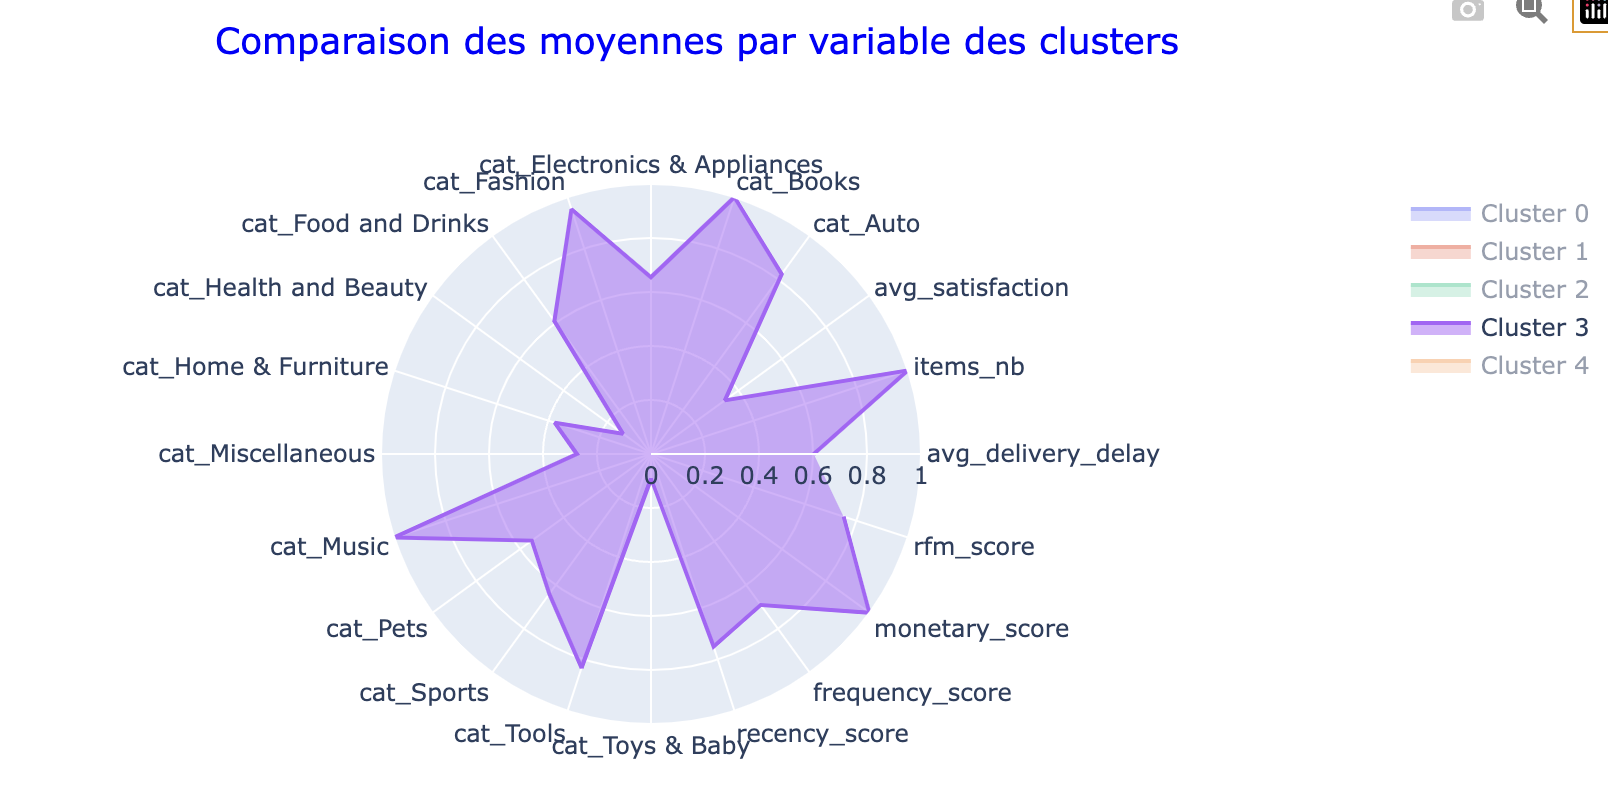

**Cluster Clients Moyens supérieur**

**Définition:** 
- fréquence d'achat dans la moyenne,
- Taux de satisfaction dans la moyenne,
- Délai de livraison dans la moyenne,
- 1.19 article par commande en moyenne, le plus elevé.
- Catégories: Mode, Music, Livres et Outils, 

**Actions recommandées:**
- Renforcer la promotion des produits des catégories pour augmenter la fréquence d'achat,
- Préferer promouvoir les produits avec taux de satisfaction elevé.

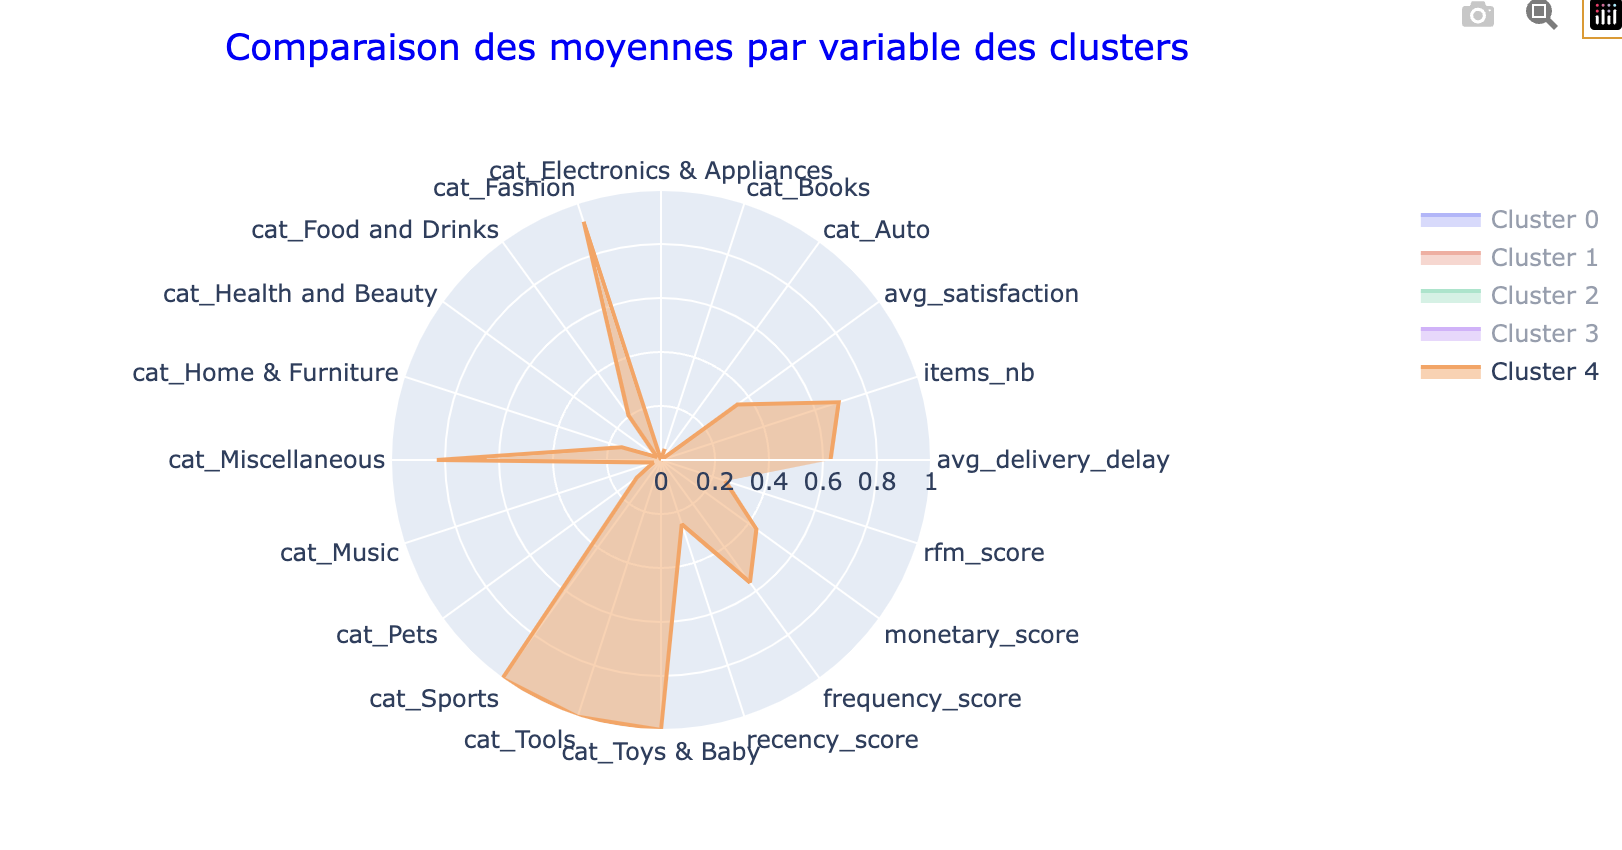

**Cluster client moyen inférieur**

**Définition:** 
- fréquence d'achat dans la moyenne,
- Taux de satisfaction dans la moyenne,
- Délai de livraison le 2e le plus long,
- 1.18 article par commande en moyenne
- Catégories:Sport, Outils, Jouets et Enfants, Divers et Électronique & Électroménager

**Actions recommandées:**
- Renforcer communication et marketing sur ces catégories,
- Mettre en place des mesures pour réduire le délai de livraison,
- - Préferer promouvoir les produits avec taux de satisfaction elevé.